In [89]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 29 00:19:32 2018

@author: gujjwaal
"""
#Project Package
import pandas as pd
import numpy as np

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge




In [90]:
train = pd.read_csv("train.csv")
train = train.drop(train.index[len(list(train))-1])
test = pd.read_csv("test.csv")
train["SalePrice"] = np.log1p(train["SalePrice"])

print(train.shape)
print(test.shape)

#print(train.info())

object_col = list(train.select_dtypes(include=['object']))



(1459, 81)
(1459, 80)


In [91]:
all_data = pd.concat((train,test), sort=True)
y_train = train.SalePrice.values
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is: {}".format(all_data.shape))


all_data size is: (2918, 80)


In [92]:
# Applying a log(1+x) transformation to all skewed numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Compute skewness
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

# Fix for skewness
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

C:\Users\gujjwaal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log1p
  # Remove the CWD from sys.path while we load stuff.


In [93]:
#Checking missing values

null_columns = all_data.columns[all_data.isnull().any()]
print(all_data[null_columns].isnull().sum())
print(len(list(null_columns)))




Alley           2720
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2347
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2813
PoolQC          2908
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64
34


                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011243    -0.009037 -0.032990    -0.028464   
MSSubClass     0.011243    1.000000    -0.386660 -0.139797     0.032631   
LotFrontage   -0.009037   -0.386660     1.000000  0.425996     0.251895   
LotArea       -0.032990   -0.139797     0.425996  1.000000     0.105820   
OverallQual   -0.028464    0.032631     0.251895  0.105820     1.000000   
OverallCond    0.013023   -0.059338    -0.059667 -0.005702    -0.091918   
YearBuilt     -0.012838    0.027856     0.123512  0.014246     0.572321   
YearRemodAdd  -0.022885    0.040632     0.089781  0.013931     0.550771   
MasVnrArea    -0.047682    0.022860     0.191463  0.103957     0.412968   
BsmtFinSF1    -0.005018   -0.069836     0.233735  0.214106     0.239667   
BsmtFinSF2    -0.006278   -0.065636     0.050219  0.111225    -0.059135   
BsmtUnfSF     -0.008232   -0.140750     0.133058 -0.002572     0.308154   
TotalBsmtSF   -0.015817  

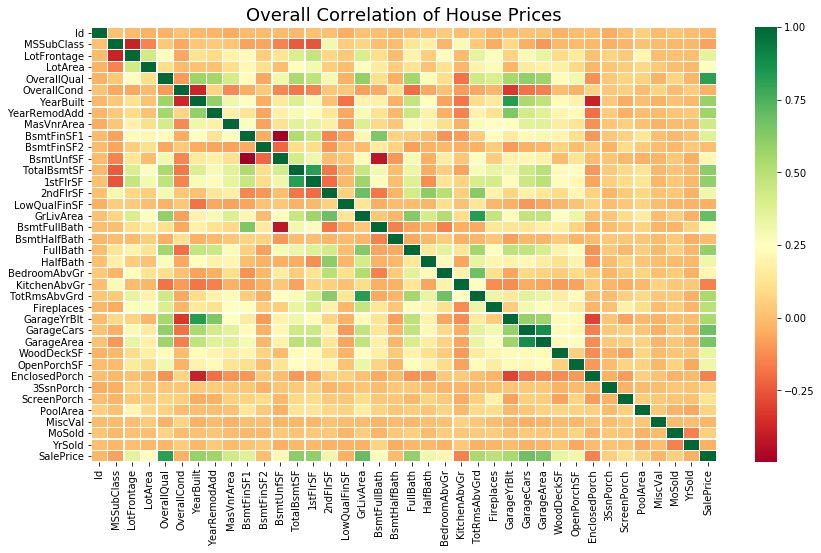

In [94]:
corr = train.corr()
print(corr)
plt.figure(figsize=(14, 8))
plt.title('Overall Correlation of House Prices', fontsize=18)
sns.heatmap(corr, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()


In [95]:
# Columns where missing values can be replaced with None
object1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for col in object1:
    all_data[col] = all_data[col].fillna('None')
# Columns where missing values can be replaced with 0
object2 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for col1 in object2:
    all_data[col1] = all_data[col1].fillna(0)

# Columns where missing values can be replaced with the mode
object3 = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities']
for col2 in object3:
    all_data[col2] = all_data[col2].fillna(all_data[col2].mode()[0])
# Imputing LotFrontage with median 
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].median())



In [96]:
null_col = all_data.columns[all_data.isnull().any()]
print(all_data[null_col].isnull().sum())


Series([], dtype: float64)


In [97]:
all_data = all_data.drop(['Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC'], axis=1)

In [98]:
# columns to get label encoded
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


for c in object_col:
    le = LabelEncoder() 
    le.fit(list(all_data[c].values)) 
    all_data[c] = le.transform(list(all_data[c].values))

KeyError: 'Utilities'

In [29]:
#all_data2 = all_data.copy()

In [30]:
#all_data2 = all_data2.drop(['Id','MSSubClass','LotFrontage','LotArea','OverallCond', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt' ,'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold' ,'YrSold'], axis =1)

In [31]:
#all_data2 = pd.get_dummies(all_data2)


In [32]:
x_train = all_data[:train.shape[0]]
x_test = all_data[test.shape[0]:]


In [47]:
#model_lasso = make_pipeline(RobustScaler(), Lasso(alpha = 5))
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005))
model_lasso.fit(x_train,y_train)
y_pred = model_lasso.predict(x_test)
y_pred = np.expm1(y_pred)

In [48]:
sample = pd.read_csv("sample_submission.csv")
sample = sample.drop(['Id'], axis=1)
#print(sample.shape)
y_test = sample.values


In [56]:
import math
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [57]:
print(mean_squared_error(y_pred,y_test))
print(rmsle(y_test,y_pred))

5135232089.19823
0.3760050717006089


In [52]:
from sklearn.ensemble import GradientBoostingRegressor


In [53]:
model_gbr = GradientBoostingRegressor(n_estimators=1200,learning_rate=0.05,max_depth=4,max_features='sqrt',min_samples_leaf=15,min_samples_split=10,loss='huber',random_state=5)
model_gbr.fit(x_train,y_train)
y_pred1 = model_gbr.predict(x_test)

In [54]:
y_pred1= np.expm1(y_pred1)
print(mean_squared_error(y_pred1,y_test))
print(rmsle(y_test,y_pred1))

5295687037.935564
0.37715743279959807


In [41]:
from catboost import CatBoostRegressor

In [55]:
model_cat = CatBoostRegressor(iterations=2000,learning_rate=0.10,depth=3,l2_leaf_reg=4,border_count=15,loss_function='RMSE',verbose=200)
model_cat.fit(x_train,y_train)
y_pred2 = model_cat.predict(x_test)
y_pred2 = np.expm1(y_pred2)

0:	learn: 10.8516380	total: 10.9ms	remaining: 21.8s
200:	learn: 0.1600247	total: 2.14s	remaining: 19.2s
400:	learn: 0.1492990	total: 4.61s	remaining: 18.4s
600:	learn: 0.1449654	total: 6.73s	remaining: 15.7s
800:	learn: 0.1386094	total: 8.82s	remaining: 13.2s
1000:	learn: 0.1352132	total: 11s	remaining: 11s
1200:	learn: 0.1323855	total: 13.3s	remaining: 8.83s
1400:	learn: 0.1299210	total: 15.5s	remaining: 6.61s
1600:	learn: 0.1270749	total: 17.5s	remaining: 4.37s
1800:	learn: 0.1255910	total: 19.9s	remaining: 2.2s
1999:	learn: 0.1241879	total: 22.1s	remaining: 0us


In [58]:
print(mean_squared_error(y_pred2,y_test))
print(rmsle(y_test,y_pred2))

5229639367.0695715
0.3856762205458536


5229639367.0695715
0.3856762205458536
